In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv("train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Questions to answer:
<ol>
 <li>Who were the passengers on the Titanic (Ages, Gender, Class ... etc)</li>
 <li>What deck were the passengers on and how does that relate to their deck</li>
 <li>Where did the passengers come from</li>
 <li>Who was alone and who was with family</li>
 <li>What factors helped someone survive the sinking of the Titanic?</li>
</ol>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

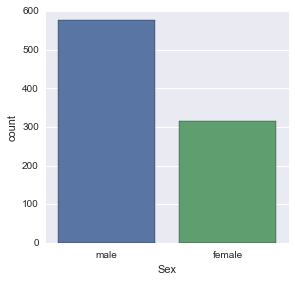

In [6]:
# pass a column argument and indicate where the data is coming 
sns.factorplot("Sex",data=titanic_df,kind="count")

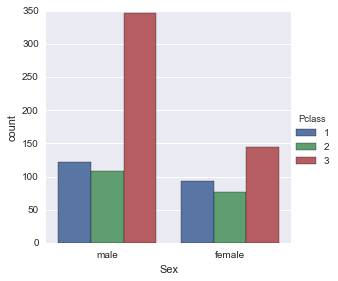

In [7]:
sns.factorplot("Sex",data=titanic_df,hue='Pclass',kind='count')

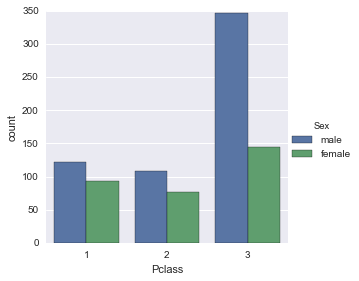

In [8]:
# hue and sex swapped to more clearly see the relationship between Sex and the class
# We can see that in 3rd class there were significantly more men than women, while in the other two classes
# the ratio of men and women is similar
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [9]:
# 'Women and children first'
# We want the split between males, females and children
# use the apply technique to create a function to handle this
def male_female_child(passenger):
    age,sex = passenger
    # if passenger is younger than 16 they are considered to be a child
    if age < 16:
        return 'child'
    else:
        return sex

    

In [10]:
# define new column called person
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


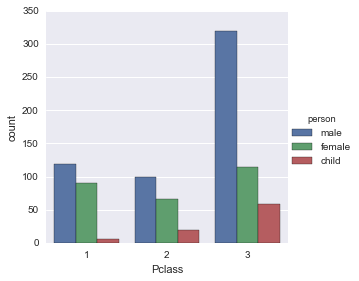

In [12]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')

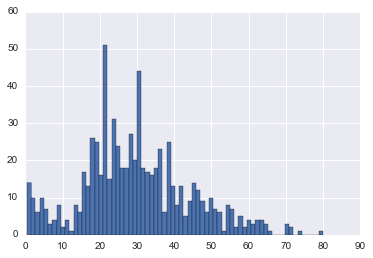

In [13]:
# distribution of the ages to see who the passengers really were
titanic_df['Age'].hist(bins=70)


In [14]:
# mean age
titanic_df['Age'].mean()

29.69911764705882

In [15]:
# comparison of male, female, child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

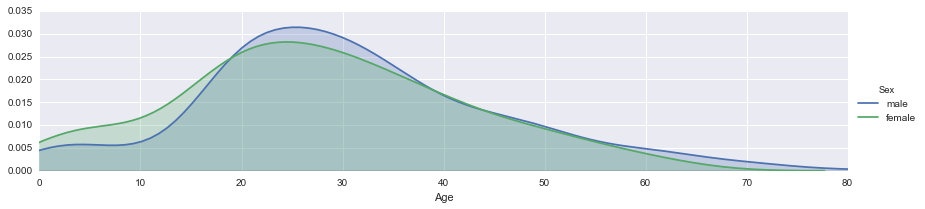

In [16]:
# facet grid to make multiple KDE plots
# see distribution of males and females
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
# set x max limit by oldest passenger
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

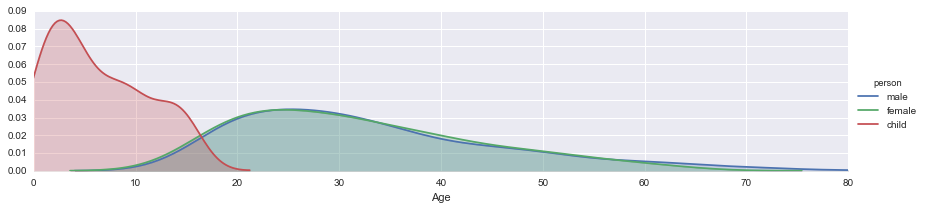

In [17]:
# facet grid to make multiple KDE plots
# see age distribution for men, women and children
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
# set x max limit by oldest passenger
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

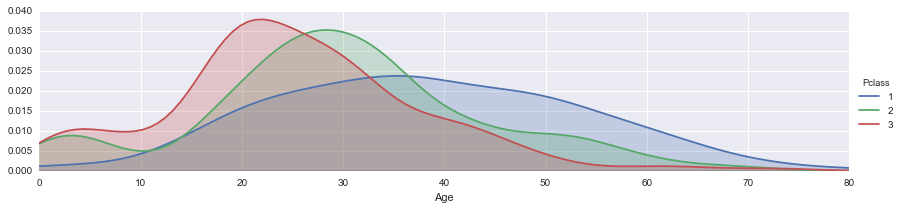

In [18]:
# facet grid to make multiple KDE plots
# see how ages ranged by class
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
# set x max limit by oldest passenger
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [19]:
# What deck were the passengers on and how does that relate to their class
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
# drop NaN values from Cabin and create a Series consisting of all the decks
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [21]:
# letter in fromt of cabin no. determines deck
# get letter from Cabin numbers to get the deck and add it to another list called
# levels
levels = []
for level in deck:
    levels.append(level[0])

levels[0:5]

['C', 'C', 'E', 'G', 'C']

In [22]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin',ascending=True,inplace=True)
cabin_df.head()

,Cabin
106,A
33,A
41,A
97,A
146,A


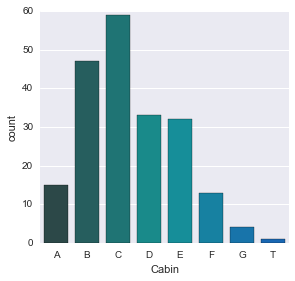

In [23]:
# create factor plot
sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')

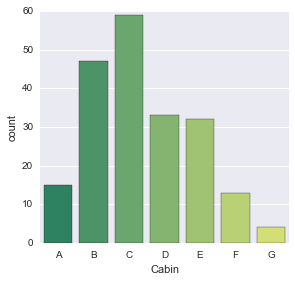

In [24]:
# cabin T was only used by 1 person - must have been exlucsive
# if we want to remove it (perhpas due to it being an outlier) we can do the
# following
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin', data=cabin_df, palette='summer',kind='count')

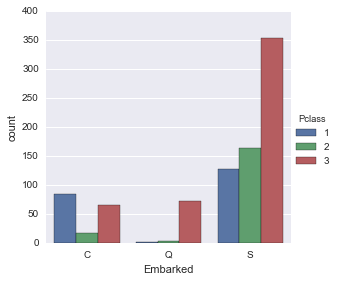

In [28]:
# The embarked column determines where people boarded the ship from
# C- Cherbourg, Q- Queenstown S- Southampton
sns.factorplot('Embarked', data=titanic_df, hue='Pclass', order=['C','Q','S'],kind='count')

<p>We can see that the majority of 3rd class passengers boarded at Southampton as well as 1st and 2nd class passengers. Very few 1st and 2nd class passengers boarded from Queenstown - almost everyone was 3rd class</p>

In [30]:
# Who was alone and who was with family?
# add a new column to define what alone means
# using SibSp (siblings or spouse on board) and Parch (parents or children on board)
# if SibSp and Parch both 0 the passenger was alone
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [32]:
# any value in the alone column that is not 0, means they had some family on board
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [34]:
# set Alone col with appropriate values
# locations where Alone value is greater than 0 marked with 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
# set locations where Alone value is equal to 0 with string 'Alone'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [35]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


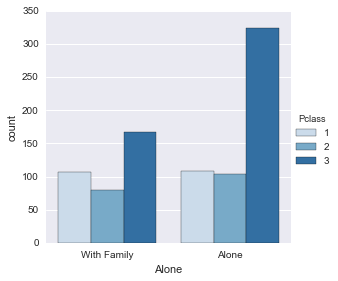

In [36]:
sns.factorplot('Alone', data=titanic_df,kind='count',hue='Pclass', palette='Blues')

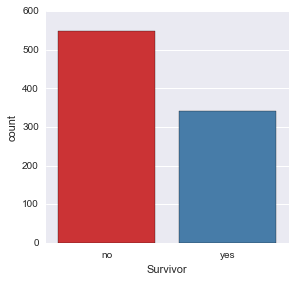

In [40]:
# What factors helped someone survive the sinking of the Titanic
# general breakdown of those that survived and those that did not
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'no', 1:'yes'})
sns.factorplot('Survivor', data=titanic_df, palette='Set1', kind='count')

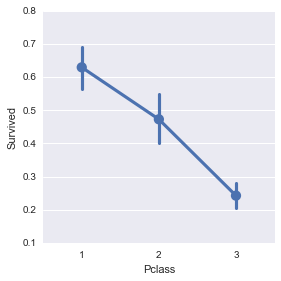

In [41]:
# Was class a factor of whether someone survived or not?
sns.factorplot('Pclass', 'Survived', data=titanic_df)

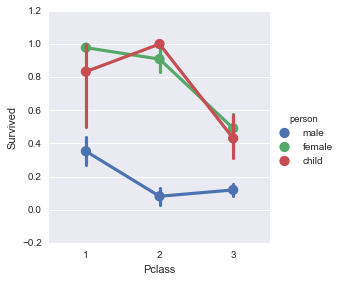

In [42]:
''' from earlier we know that 3rd class mostly comprised of males. How can we take
into account class and gender? '''
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df)

We can see from the graph above that being male severely reduced the chance of survival regardless of the class of the passenger

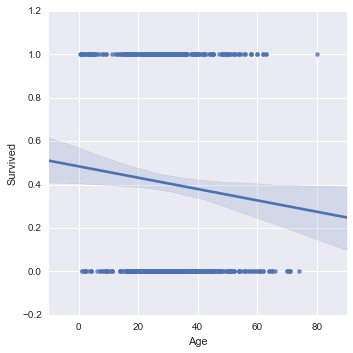

In [43]:
sns.lmplot('Age', 'Survived', data=titanic_df)

The general trend is that the higher the age of the passenger the lower the chance of survival

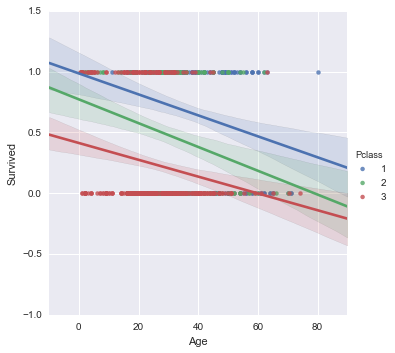

In [45]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df)

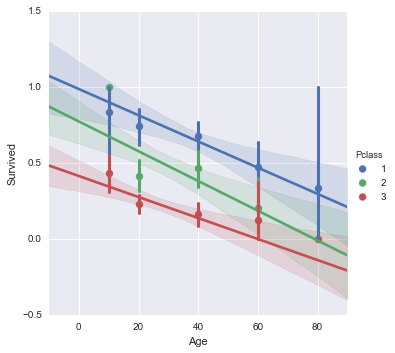

In [47]:
# using exbit argument to clean up the figure
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass',data=titanic_df, x_bins=generations)

There is a noticeably high standard deviation for survival on elderly people in the first class. 

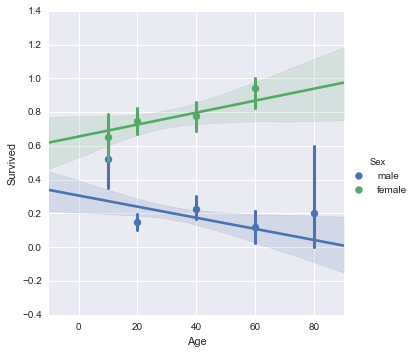

In [48]:
sns.lmplot('Age', 'Survived',hue='Sex', data=titanic_df,x_bins=generations)

<strong>Further Questions:</strong>
<ol>
    <li>Did the deck have an effect on the passenger's survival rate e.g. does being on A grant a higher survival rate. Does the answer match up with your intuition?</li>
    <li>Did having a family member increase the odds of surviving the crash</li>
</ol>